## Ana Isabel Moreno Hernández 

## Mecánica Analítica

# Tarea 2

La ecuación del péndulo forzado amortiguado es:


$$Aceleración+Amortiguamiento+Gravedad=Fuerza externa$$


que como ecuación se ve
<img src="https://latex.codecogs.com/gif.latex?\ddot{\theta}&plus;\mu&space;\dot{\theta}&plus;w_0^2\sin(\theta)=A&space;\cos&space;(w_d&space;\&space;t)" title="\ddot{\theta}+\mu \dot{\theta}+\sin(\theta)=A \cos (w_d \ t)" />

1.- Límite lineal. 

Considerando ángulos pequeños, tenemos la ecuación lineal forzada y amortiguada vista en clase, cuya solución particular (aquella que domina a tiempos grandes) tiene una función Coseno con una cierta amplitud y fase dada en términos de los parametros de la ecuación anterior. Tomando $A=1$, $\omega_0 = 1$ y $\mu= 0.05$.


    a) Graficar la Amplitud como función de la frecuencia de la fuerza externa. ¿Existe alguna resonancia?

La ecuación obtenida en clase para la amplitud de la solución particular que depende de la frecuencia de la fuerza externa es 
$$D = \frac{A}{\sqrt{(\omega_0^2-\omega_d^2)^2+\omega_d^2\mu^2}}$$
donde $\omega_d$ es la frecuencia de la fuerza externa. 


In [56]:
#Importamos los módulos necesarios 
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import math
from scipy.integrate import odeint

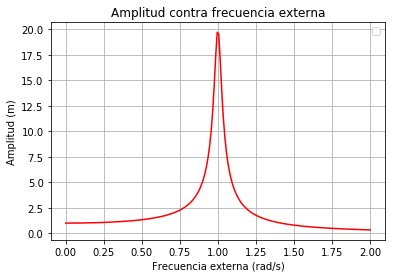

In [57]:
#Código para la gráfica correspondiente
#Inicializamos las variables A, ω0 y μ.
A = 1.0
ome0 = 1.0   #frecuencia natural del sistema
mu = 0.05

#Código para la gráfica correspondiente
ome = np.linspace(0,2,num=200)   #frecuencia externa
amp = A / (pow(pow(pow(ome0,2) - pow(ome,2),2) + pow(ome*mu,2),0.5))   #amplitud
plt.plot( ome, amp, color="red")
plt.legend(loc='best')
plt.title("Amplitud contra frecuencia externa")
plt.xlabel("Frecuencia externa (rad/s)", fontsize = 10)
plt.ylabel("Amplitud (m)", fontsize = 10)
plt.grid(True)
plt.show()

Sí hay resonancia, se alcanzan una amplitud máxima cuando $\omega = \omega_0 = 1$ 

    b) Graficar la Fase de la solución como función de la frecuencia de la fuerza externa.

La ecuación obtenida en clase para la fase de la solución particular que depende de la frecuencia de la fuerza externa es $$\delta = tan^{-1}(\frac{\omega_d\mu}{\omega_0^2-\omega_d^2})$$


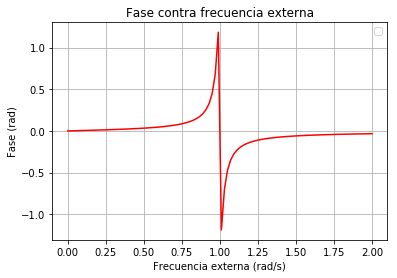

In [58]:
#Anteriormente las librerías fueron llamadas y las variables fueron inicializadas
#Código para la gráfica correspondiente
mu = 0.05
ome0 = 1.0  #frecuencia natural 
ome = np.linspace(0,2,num=100)  #frecuencia de la fuerza externa
delta = np.arctan((ome * mu) / (pow(ome0,2) - pow(ome,2)))
plt.plot( ome, delta, color="red")
plt.legend(loc='best')
plt.title("Fase contra frecuencia externa")
plt.xlabel("Frecuencia externa (rad/s)", fontsize = 10)
plt.ylabel("Fase (rad)", fontsize = 10)
plt.grid(True)
plt.show()


    c) Graficar el ángulo y la velocidad angular como función del tiempo para 2 condiciones iniciales distintas.   

La solución de la ecuación diferencial es $$\theta(t) = \theta_{homogénea}(t) + \theta_{particular}(t)$$
donde $$\theta_{homogénea}(t) = \alpha e^{-\frac{\mu}{2}t}cos(\omega_1t - \phi)$$

Debido a que $\mu = 0.05$ y $\omega_0 = 1$, notamos que $\omega_0^2 > \frac{\mu^2}{4}$, por lo que se trata de un oscilador infra-amortiguado. Además, $\omega_1 = \sqrt{\omega_0^2 - \frac{\mu^2}{4}}$ (por lo analizado en clase). $\alpha$ y $\phi$ dependen de las condiciones iniciales del sistema. 

Además, 
$$\theta_{particular} = Dcos(\omega_dt - \delta) = \frac{A}{\sqrt{(\omega_0^2-\omega_d^2)^2+\omega_d^2\mu^2}}cos(\omega_dt - tan^{-1}(\frac{\omega_d\mu}{\omega_0^2-\omega_d^2}))$$

Así, $$θ(t) = \alpha e^{-\frac{\mu}{2}t}cos(\omega_1t - \phi) + \frac{A}{\sqrt{(\omega_0^2-\omega_d^2)^2+\omega_d^2\mu^2}}cos(\omega_dt - tan^{-1}(\frac{\omega_d\mu}{\omega_0^2-\omega_d^2}))$$

Y

$$\dot{θ}(t) = -\alpha e^{-\frac{\mu}{2}t}(\frac{\mu}{2}cos(\omega_1t-\phi)+\omega_1sin(\omega_1t-\phi)) - \frac{A\omega_d}{\sqrt{(\omega_0^2-\omega_d^2)^2+\omega_d^2\mu^2}}sin(\omega_dt - tan^{-1}(\frac{\omega_d\mu}{\omega_0^2-\omega_d^2}))$$

In [59]:
#funciones para graficar ángulo y velocidad angular de las soluciones homogénea y particular
def amplitud():
  amp = A / (pow(pow(pow(ome0,2) - pow(omed,2),2) + pow(omed*mu,2),0.5))
  return amp


def fase():
  fas = np.arctan((omed * mu) / (pow(ome0,2) - pow(omed,2)))
  return fas


def theta_part(t):
  theta_part = amplitud()*np.cos(omed*t - fase())  
  return theta_part


def theta_homo(t, alpha,phi):
  theta_homo = alpha*np.exp(-(mu/2.0)*t)*np.cos(ome1*t - phi)
  return theta_homo

    
def vel_part(t):      
  vel_part = -amplitud()*omed*np.sin(omed*t - fase())
  return vel_part


def vel_homo(t,alpha,phi):
  vel_homo = -(alpha)*np.exp(-(mu/2)*t)*(0.5*mu*np.cos(ome1*t - phi) + ome1*np.sin(ome1*t - phi))
  return vel_homo

- Primero, graficamos la solución particular del ángulo que depende del tiempo con condiciones iniciales $A = 0.5$, $\mu = 0.05$ y $\omega_0 = 2$ y luego con condiciones $A = 2$, $\mu = 0.1$ y $\omega_0 = 2$

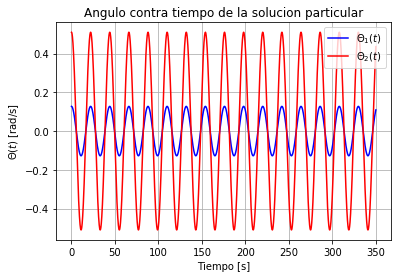

In [60]:
#Gráfica de la solución particular
t = np.linspace(0,350,num=10000) 
#Primeras condiciones iniciales
A = 0.5
mu = 0.05
ome0 = 2.0
ome1 = pow(pow(ome0,2)-0.25*pow(mu,2),0.5)  #Un valor deseado para ome1, aunque puede ser cualquiera
omed = ome1/7.0                             #Un valor deseado para omed, aunque puede ser cualquiera
plt.plot( t, theta_part(t), 'b',label = '$\Theta_1(t)$')

#Segundas condiciones iniciales
A = 2.0
mu = 0.1
ome0 = 2.0
plt.plot( t, theta_part(t), 'r',label = '$\Theta_2(t)$')

plt.legend(loc='best')
plt.title("Angulo contra tiempo de la solucion particular")
plt.xlabel("Tiempo [s]", fontsize = 10)
plt.ylabel("$\Theta(t)$ [rad/s]", fontsize = 10)
plt.grid(True)
plt.show()


- Ahora, graficamos la solución particular de la velocidad angular que depende del tiempo con condiciones iniciales $A = 0.5$, $\mu = 0.05$ y $\omega_0 = 2$ y luego con condiciones $A = 2$, $\mu = 0.1$ y $\omega_0 = 2$, las mismas para $\theta_1$ y $\theta_2$, respectivamente. 

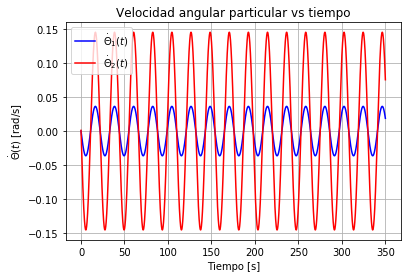

In [61]:
#Gráfica de la solución particular de la velocidad angular
t = np.linspace(0,350,num=10000) 
#Primeras condiciones iniciales
A = 0.5
mu = 0.05
ome0 = 2.0
plt.plot( t, vel_part(t), 'b',label = '$\dot\Theta_1(t)$')

#Segundas condiciones iniciales
A = 2.0
mu = 0.1
ome0 = 2.0
plt.plot( t, vel_part(t), 'r',label = '$\dot\Theta_2(t)$')

plt.legend(loc='best')
plt.title("Velocidad angular particular vs tiempo")
plt.xlabel("Tiempo [s]", fontsize = 10)
plt.ylabel("$\dot\Theta(t)$ [rad/s]", fontsize = 10)
plt.grid(True)
plt.show()


También podemos graficar la solución particular y la solución homogénea para $\theta(t)$ con $A = 2.0$, $\mu = 0.1$ y $\omega_0 = 2.0$ para observar la diferencia entre ellas. Para la solución homogénea se utilizan las condiciones iniciales $\theta(0) = \pi/18$ y $\dot{\theta}(0) = 0$, por lo tanto, en la solución homogénea $\alpha = 0.1745$ y $\phi = 0.025$. Debe recordarse que son ángulos muy pequeños.  

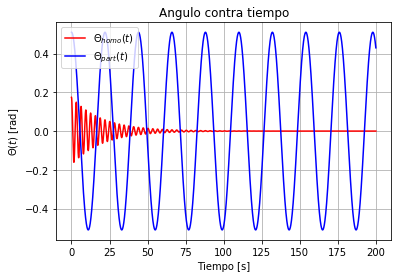

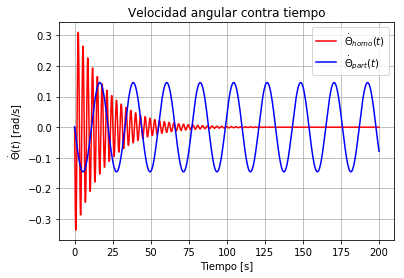

In [62]:
#Graficamos ángulo de la solución particular y homogénea contra tiempo utilizando las funciones anteriores
A = 2.0
mu = 0.1
ome0 = 2.0
ome1 = pow(pow(ome0,2)-0.25*pow(mu,2),0.5)  #Un valor deseado para ome1, aunque puede ser cualquiera
omed = ome1/7.0                             #Un valor deseado para omed, aunque puede ser cualquiera
alpha = 0.1745
phi = 0.025

t = np.linspace(0,200,num=10000) 
plt.plot( t, theta_homo(t,alpha,phi), 'r',label = '$\Theta_{homo}(t)$')
plt.plot( t, theta_part(t), 'b',label = '$\Theta_{part}(t)$')
plt.legend(loc='best')
plt.title("Angulo contra tiempo")
plt.xlabel("Tiempo [s]", fontsize = 10)
plt.ylabel("$\Theta(t)$ [rad]", fontsize = 10)
plt.grid(True)
plt.show()

#Graficamos velocidad contra tiempo utilizando las funciones anteriores
t = np.linspace(0,200,num=10000)
plt.plot( t, vel_homo(t,alpha,phi), 'r',label = '$\dot\Theta_{homo}(t)$')
plt.plot( t, vel_part(t), 'b',label = '$\dot\Theta_{part}(t)$')
plt.legend(loc='best')
plt.title("Velocidad angular contra tiempo")
plt.xlabel("Tiempo [s]", fontsize = 10)
plt.ylabel("$\dot\Theta(t)$ [rad/s]", fontsize = 10)
plt.grid(True)
plt.show()


Puede observarse que conforme el tiempo avanza, la solución homogénea desaparece y la única que se conserva es la particular. 

Ahora graficamos la suma de las soluciones, es decir, la solución total para el ángulo y la velocidad angular que dependen del tiempo. 

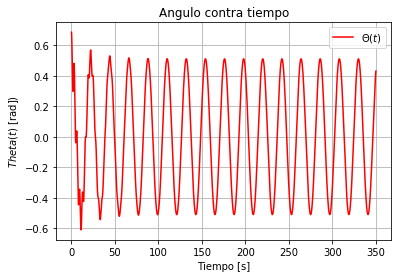

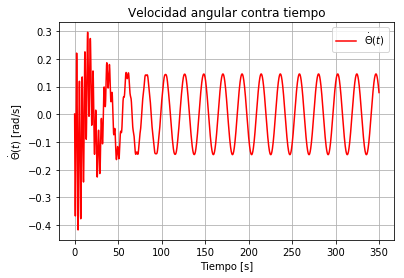

In [63]:
#Graficamos solución total para el ángulo y la velocidad angular
A = 2.0
mu = 0.1
ome0 = 2.0
ome1 = pow(pow(ome0,2)-0.25*pow(mu,2),0.5)  
omed = ome1/7.0                             
alpha = 0.1745
phi = 0.025
#Graficamos angulo contra tiempo
t = np.linspace(0,350,num=10000) 
plt.plot( t, theta_homo(t,alpha,phi)+theta_part(t), 'r',label = '$\Theta(t)$')
plt.legend(loc='best')
plt.title("Angulo contra tiempo")
plt.xlabel("Tiempo [s]", fontsize = 10)
plt.ylabel("$Theta(t)$ [rad])", fontsize = 10)
plt.grid(True)
plt.show()

#Graficamos velocidad angular contra tiempo 
t = np.linspace(0,350,num=10000)
plt.plot( t, vel_homo(t,alpha,phi)+vel_part(t), 'r',label = '$\dot\Theta(t)$')
plt.legend(loc='best')
plt.title("Velocidad angular contra tiempo")
plt.xlabel("Tiempo [s]", fontsize = 10)
plt.ylabel("$\dot\Theta(t)$ [rad/s]", fontsize = 10)
plt.grid(True)
plt.show()

Puede observarse la perturbación en la solución generada por la solución homogénea, pero a medida que el tiempo avanza, esta perturbación disminuye y lo único que se observa en la gráfica es la solución particular. 

    d) Graficar en el espacio fase las 2 trayectorias con condiciones iniciales distintas del inciso anterior.

Graficamos en el espacio fase las dos trayectorias, una con las primeras condiciones iniciales $A = 0.5$, $\mu = 0.05$ y $\omega_0 = 2$ y luego con $A = 2$, $\mu = 0.1$ y $\omega_0 = 2$. Cabe mencionar que en este diagrama fase se toma en cuenta sólo la solución particular para la ecuación diferencial, tal y como lo indica el inciso. Sin embargo, al final de este inciso se mostrará el diagrama fase de la solución homogénea más la particular, para analizar las diferencias.

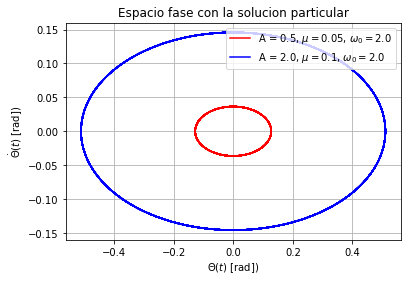

In [64]:
#Gráfica del espacio fase utilizando la solución particular
t = np.linspace(0,350,num=10000) 

#Espacio fase: primeras condiciones iniciales
A = 0.5
mu = 0.05
ome0 = 2.0
ome1 = pow(pow(ome0,2)-0.25*pow(mu,2),0.5)  #Un valor deseado para ome1, aunque puede ser cualquiera
omed = ome1/7.0                             #Valor cualquiera para omed
plt.plot( theta_part(t), vel_part(t), 'r',label = 'A = 0.5, $\mu = 0.05$, $\omega_0 = 2.0$')

#Espacio fase: segundas condiciones iniciales
A = 2.0
mu = 0.1
ome0 = 2.0
plt.plot( theta_part(t), vel_part(t), 'b',label = 'A = 2.0, $\mu = 0.1$, $\omega_0 = 2.0$')

plt.legend(loc='best')
plt.title("Espacio fase con la solucion particular")
plt.xlabel("$\Theta(t)$ [rad])", fontsize = 10)
plt.ylabel("$\dot\Theta(t)$ [rad])", fontsize = 10)
plt.grid(True)
plt.show()

Lo siguiente es el esoacio fase tomando en cuenta sólo la solución homogénea con condiciones iniciales de $\theta(0) = \pi/18$ y $\dot\theta(0) = 0$, es decir $ \alpha = 0.1745$ y $\phi = 0.025$ en la ecuación de la solución homogénea mostrada anteriormente. 

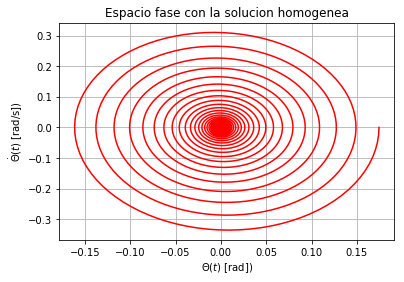

In [65]:
#Gráfica del diagrama fase de la solución homogénea
A = 2.0
mu = 0.1
ome0 = 2.0
ome1 = pow(pow(ome0,2)-0.25*pow(mu,2),0.5)  
omed = ome1/7.0                             
alpha = 0.1745
phi = 0.025
#Graficamos angulo contra tiempo
t = np.linspace(0,350,num=10000) 
plt.plot( theta_homo(t,alpha,phi), vel_homo(t,alpha,phi), 'r')
plt.title("Espacio fase con la solucion homogenea")
plt.xlabel("$\Theta(t)$ [rad])", fontsize = 10)
plt.ylabel("$\dot\Theta(t)$ [rad/s])", fontsize = 10)
plt.grid(True)
plt.show()

Ahora, tomando en cuenta la solución homogénea y particular, el diagrama fase luce así:

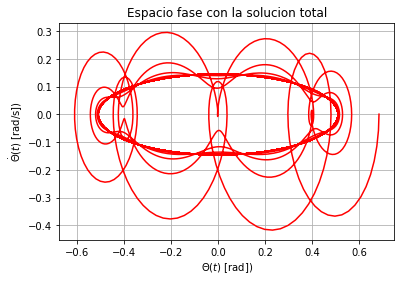

In [66]:
#Gráfica del diagrama fase tomando en cuenta la solución particular y la homogénea
A = 2.0
mu = 0.1
ome0 = 2.0
ome1 = pow(pow(ome0,2)-0.25*pow(mu,2),0.5)  
omed = ome1/7.0                             
alpha = 0.1745
phi = 0.025
#Graficamos angulo contra tiempo
t = np.linspace(0,800,num=10000) 
plt.plot( theta_homo(t,alpha,phi)+theta_part(t), vel_homo(t,alpha,phi)+vel_part(t), 'r')
plt.title("Espacio fase con la solucion total")
plt.xlabel("$\Theta(t)$ [rad])", fontsize = 10)
plt.ylabel("$\dot\Theta(t)$ [rad/s])", fontsize = 10)
plt.grid(True)
plt.show()

Puede observarse que se obtiene un espacio fase límite, conforme el tiempo avanza, el espacio fase de la solución homogénea va desapareciendo y sólo se observaría el espacio fase de la solución particular, es decir, una elipse. 

       e) Graficar en el espacio fase 2 trayectorias con dos A's distintas, con $\mu = 0$ y la misma condición inicial. 

Primero graficamos el espacio fase con $A = 3$, $\mu = 0$ y $\omega_0 = 1$, luego con $A = 0.1$, $\mu = 0$ y $\omega_0 = 1.$. Cabe mencionar que el espacio fase para este ejercicio es utilizando solamente la solución particular. 

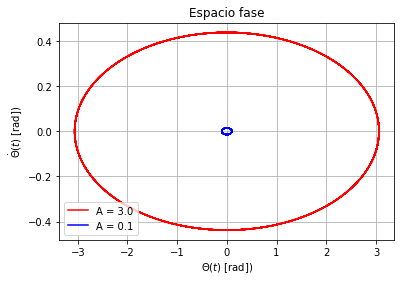

In [67]:
mu = 0.0
ome0 = 1.0
ome1 = pow(pow(ome0,2)-0.25*pow(mu,2),0.5)  #Un valor deseado para ome1, aunque puede ser cualquiera
omed = ome1/7.0                             #Valor cualquiera para omed

t = np.linspace(0,350,num=10000) 
#Espacio fase con A = 3
A = 3.0
plt.plot( theta_part(t), vel_part(t), 'r',label = 'A = 3.0')

#Espacio fase con A = 0.1
A = 0.1
plt.plot( theta_part(t), vel_part(t), 'b',label = 'A = 0.1')

plt.legend(loc='best')
plt.title("Espacio fase")
plt.xlabel("$\Theta(t)$ [rad])", fontsize = 10)
plt.ylabel("$\dot\Theta(t)$ [rad])", fontsize = 10)
plt.grid(True)
plt.show()


     f)  Graficar en el espacio fase 2 trayectorias con $\mu$ =0.0,2.0,0.1, para la misma ampltidud A = 2 y la misma condición inicial.

Primero graficamos el espacio fase con $A = 2.0$, $\mu = 0$ y $\omega_0 = 1$, luego con $\mu = 2.0$ y por último $\mu = 0.1$ con la misma A y la misma $\omega_0$. Cabe mencionar el espacio fase para este ejercicio es utilizando solamente la solución particular. 

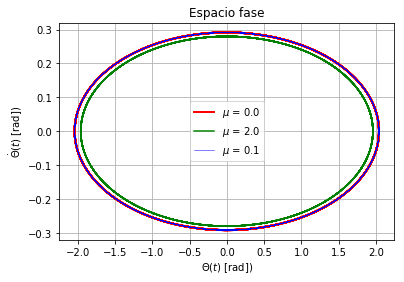

In [68]:
A = 2.0
ome0 = 1.0
ome1 = pow(pow(ome0,2)-0.25*pow(mu,2),0.5)  #Un valor deseado para ome1, aunque puede ser cualquiera
omed = ome1/7.0                             #Valor cualquiera para omed

t = np.linspace(0,350,num=10000) 
#Espacio fase con mu = 0
mu = 0.0
plt.plot( theta_part(t), vel_part(t), 'r', linewidth = 2,label = '$\mu$ = 0.0')

#Espacio fase con mu = 0
mu = 2.0
plt.plot( theta_part(t), vel_part(t), 'g',label = '$\mu$ = 2.0')

#Espacio fase con mu = 0
mu = 0.1
plt.plot( theta_part(t), vel_part(t), 'b', linewidth = 0.5,label = '$\mu$ = 0.1')

plt.legend(loc='best')
plt.title("Espacio fase")
plt.xlabel("$\Theta(t)$ [rad])", fontsize = 10)
plt.ylabel("$\dot\Theta(t)$ [rad])", fontsize = 10)
plt.grid(True)
plt.show()

Utiliza el módulo de odeint en la libreria scipy (from scipy.integrate import odeint) para encontrar soluciones numéricas en los siguientes problemas.


2.- Ecuación no lineal no forzada sin amortiguamiento.

La ecuación no lineal del péndulo no forzado y sin amortiguamiento es
$$Aceleración + Gravedad = 0$$
que como ecuación se ve
$$\ddot\theta + \omega_0^2sin(\theta) = 0$$

    a) Para un ángulo inicial de 70 grados en reposo y una frecuencia natural unitaria, realiza una gráfica donde compares la solucion numérica del ángulo y su velocidad con aquella de la ecuación lineal usando las mismas condiciones iniciales.

Para resolver esta ecuación con odeint, primero la convertimos a un sistema de ecuaciones de primer orden. 

Por definición, la velocidad angular es $$\omega = \dot\theta$$
Así, obtenemos el sistema de ecuaciones:
$$\dot\theta(t) = \omega(t)$$ 
y $$\dot\omega(t) = -\omega_0^2sin\theta$$
Ahora, dejemos a g como el vector ($\theta$, $\omega$), es decir, g = ($\theta$, $\omega$). Por lo tanto, 
$$\dot g = (\omega, -\omega_0^2sin\theta) $$

Esto puede implementarse con la siguiente función:

In [77]:
#Función para el vector g
def funcion(g, t, ome_0, a):
  (theta, omega) = g
  dgdt = (omega, -pow(ome_0,2)*np.sin(theta))
  return dgdt

Utilizando las condiciones iniciales de $\theta(0) = 70^\circ = 7\pi/18$ y $\dot\theta(0) = \omega(0) = 0$ dadas en el ejercicio, el vector g con condiciones iniciales queda como $$g(0) = (7\pi/18, 0)$$

In [70]:
#Condiciones iniciales para el vector g
g0 = (np.pi*7.0/18.0,0.0)

La frecuencia natural tiene valor $\omega_0 = 1$. Ahora, graficamos la solución numérica de la ecuación diferencial con la función odeint para $\theta(t)$ y $\omega(t)$. 

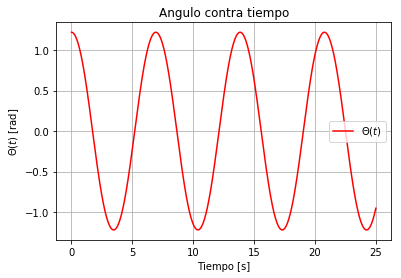

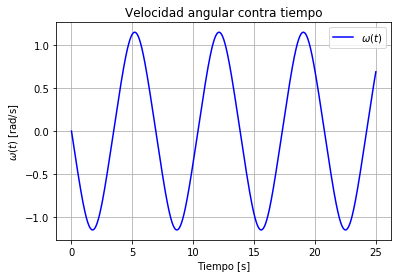

In [71]:
#Gráfica de la solución numérica para el ángulo y la velocidad angular
a = 0  #no se ocupa realmente, es solo para tener dos argumentos en args de odeint
ome_0 = 1.0
t = np.linspace(0, 25, 10000)
sol = odeint(funcion, g0, t, args = (ome_0,a))

plt.plot(t, sol[:, 0], 'r', label='$\Theta(t)$')
plt.legend(loc='best')
plt.title("Angulo contra tiempo")
plt.ylabel('$\Theta(t)$ [rad]')
plt.xlabel('Tiempo [s]')
plt.grid()
plt.show()

plt.plot(t, sol[:, 1], 'b', label='$\omega(t)$')
plt.legend(loc='best')
plt.title('Velocidad angular contra tiempo')
plt.ylabel('$\omega(t)$ [rad/s]')
plt.xlabel('Tiempo [s]')
plt.grid()
plt.show()


La ecuación lineal del péndulo no forzado y sin amortiguamiento es $$\ddot\theta + \omega_0^2\theta = 0$$
Y tiene como solución: $$\theta(t) = Bcos(\omega_0t - \delta) $$ 
Así, la expresión para la velocidad angular es $$\dot\theta(t) = -B\omega_0sin(\omega_0t - \delta)$$
donde B y $\delta$ dependen de las condiciones iniciales del sistema. 


Las funciones para la solución lineal y no lineal son:

In [72]:
#Funciones para la solución lineal y no lineal
def sol_nolin(t):
  sol_no = odeint(funcion, g0, t, args = (ome_0,a))
  return sol_no

def sol_lin(t):
  sol_li = B*np.cos(ome_0*t - delta)
  return sol_li

Con las mismas condiciones iniciales: $\theta(0) = 70^\circ = 7\pi/18$ y $\dot\theta(0) = 0$, obtenemos a $B = 70^\circ = 7\pi/18$ y $\delta = 0$.

Ahora, comparamos estas dos soluciones con las siguientes gráficas:

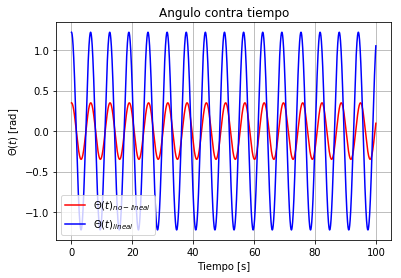

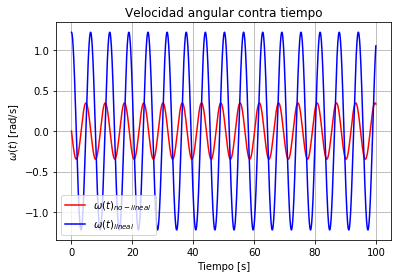

In [143]:
#Gráficas del ángulo contra el tiempo para la ecuación no lineal y la lineal
ome_0 = 1.0
delta = 0
B = 7.0*np.pi/18.0
t = np.linspace(0, 100, 10000)
plt.plot(t, sol_nolin(t)[:,0], 'r', label='$\Theta(t)_{no-lineal}$')
plt.plot(t, sol_lin(t), 'b', label='$\Theta(t)_{lineal}$')
plt.legend(loc='best')
plt.title('Angulo contra tiempo')
plt.xlabel('Tiempo [s]')
plt.ylabel('$\Theta(t)$ [rad]')
plt.grid()
plt.show()

#Gráficas de la velocidad angular contra el tiempo para la ecuación no lineal y la lineal
ome_0 = 1.0
delta = 0.0
B = 7.0*np.pi/18.0
t = np.linspace(0, 100, 10000)
plt.plot(t, sol_nolin(t)[:,1], 'r', label='$\omega(t)_{no-lineal}$')
plt.plot(t, sol_lin(t), 'b', label='$\omega(t)_{lineal}$')
plt.legend(loc='best')
plt.title('Velocidad angular contra tiempo')
plt.xlabel('Tiempo [s]')
plt.ylabel('$\omega(t)$ [rad/s]')
plt.grid()
plt.show()

En ambas gráficas, puede observarse que las soluciones para el ángulo y para la velocidad angular en la ecuación no lineal van creciendo a medida que aumenta el tiempo, es decir, su periodo no es constante y se observa que éste aumenta conforme el tiempo avanza; mientras que en las soluciones de la ecuación lineal el periodo permanece constante. 

    b) Construye el espacio fase para una frecuencia natural unitaria, usando trayectorias que partan del reposo con un ángulo inicial que vaya de -90 a 90 grados, en intervalos de 10 grados. Suma dos trayectorias que den vueltas, una en contra de las manecillas del reloj y otra a favor.

Las condiciones iniciales cambian. Llamemos a $\beta$ el ángulo inicial cuando t = 0, es decir, $\theta(0) = \beta$ y, como parte del reposo, $\dot\theta(0) = 0$. Así, el vector $g$ tiene las condiciones iniciales $$g(0) = (\beta, 0)$$

Ahora, graficamos el espacio fase con las nuevas condiciones iniciales, donde $\beta$ va de -90 a 90 en intervalos de 10 grados.

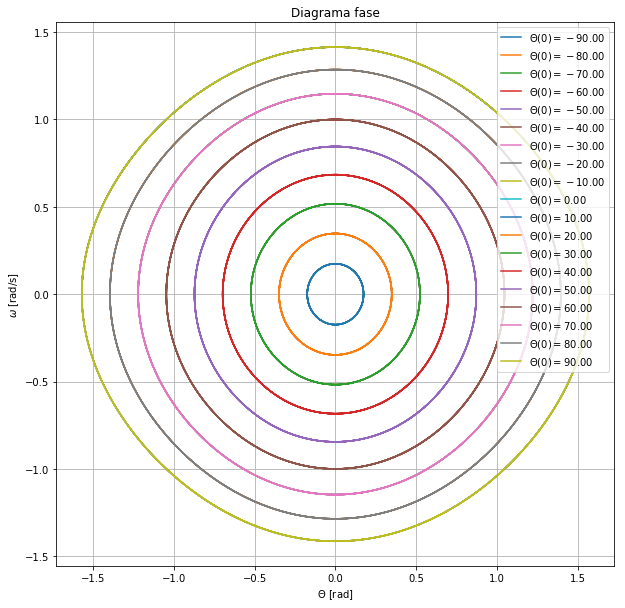

In [74]:
#Gráficas para los espacios fase de los dinstintos valores del ángulo inicial. 
ome_0 = 1.0

def convert(b):
  conv = b*np.pi/180.0
  return conv

plt.figure(figsize=(10,10))
t = np.linspace(0, 25, 10000)
for i in range(-90,91,10):
  g0 = (convert(i),0.0)
  plt.plot(sol_nolin(t)[:,0], sol_nolin(t)[:,1], label='$\Theta(0)={:.2f}$'.format(i))

    
plt.legend()    
plt.title('Diagrama fase')
plt.xlabel('$\Theta$ [rad]')
plt.ylabel('$\omega$ [rad/s]')
plt.grid()
plt.show()

Ahora se graficarán la suma de dos trayectorias que den vueltas, una en contra de las manecillas del reloj y otra a favor. Para las distintas gráficas, se suman las trayectorias con ángulo inicial de $60^\circ$ y $45^\circ$, $90^\circ$ y $0^\circ$ y, finalmente, $80^\circ$ y $20^\circ$. A continuación, se muestra el código: 

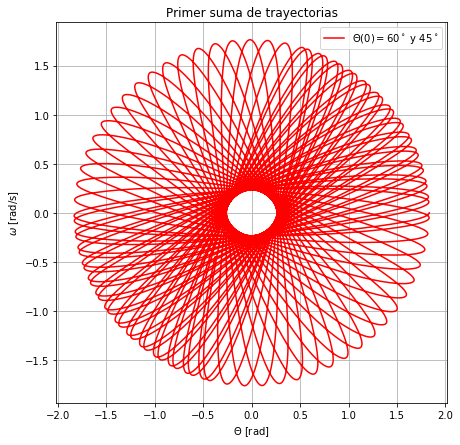

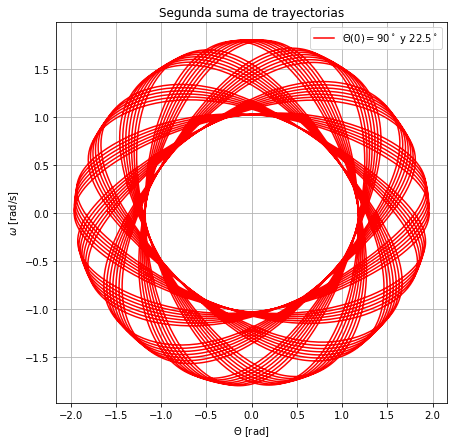

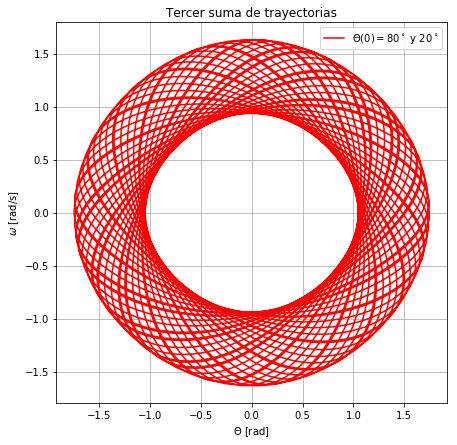

In [75]:
#Gráficas para la suma de dos trayectorias que dan vueltas, una en contra de las manecillas y otra a favor. 
ome_0 = 1.0

plt.figure(figsize=(7,7))
t = np.linspace(0, 300, 10000)
#Primer suma de trayectorias
g0 = (np.pi/3.0,0.0)
sol1 = sol_nolin(t)
g0 = (np.pi/4.0,0.0)
sol2 = sol_nolin(-t)   #Aquí se logra que una de las trayectorias vaya en contra
plt.plot(sol1[:,0] + sol2[:,0], sol1[:,1] + sol2[:,1], 'r',label='$\Theta(0)= 60^\circ$ y $45^\circ$')
plt.legend()    
plt.title('Primer suma de trayectorias')
plt.xlabel('$\Theta$ [rad]')
plt.ylabel('$\omega$ [rad/s]')
plt.grid()
plt.show()
#Segunda suma de trayectorias
plt.figure(figsize=(7,7))
g0 = (np.pi/2.0,0.0)
sol3 = sol_nolin(t)
g0 = (np.pi/8.0,0.0)
sol4 = sol_nolin(-t)
plt.plot(sol3[:,0] + sol4[:,0], sol3[:,1] + sol4[:,1], 'r',label='$\Theta(0)= 90^\circ$ y $22.5^\circ$')
plt.legend()    
plt.title('Segunda suma de trayectorias')
plt.xlabel('$\Theta$ [rad]')
plt.ylabel('$\omega$ [rad/s]')
plt.grid()
plt.show()
#Tercer suma de trayectorias
plt.figure(figsize=(7,7))
g0 = (4*np.pi/9.0,0.0)
sol5 = sol_nolin(t)
g0 = (np.pi/9.0,0.0)
sol6 = sol_nolin(-t)
plt.plot(sol5[:,0] + sol6[:,0], sol5[:,1] + sol6[:,1], 'r',label='$\Theta(0)= 80^\circ$ y $20^\circ$')
plt.legend()    
plt.title('Tercer suma de trayectorias')
plt.xlabel('$\Theta$ [rad]')
plt.ylabel('$\omega$ [rad/s]')
plt.grid()
plt.show()

3.- Ecuación no lineal amortiguada no forzada.

La ecuación no lineal del péndulo no forzado y con amortiguamiento es
$$Aceleración + Amortiguamiento + Gravedad = 0$$
que como ecuación se ve
$$\ddot\theta + \mu\dot\theta + \omega_0^2sin(\theta) = 0$$

    a) Utiliza un parámetro de amortiguamiento de 0.02, la frecuencia natural unitaria y observa cómo el espacio fase se distorciona. Compara cada trayectoria del inciso b) del ejercio anterior con este caso amortiguado.

Para resolver esta ecuación con odeint, primero la convertimos a un sistema de ecuaciones de primer orden. 

Por definición, la velocidad angular es $$\omega = \dot\theta$$
Así, obtenemos el sistema de ecuaciones:
$$\dot\theta(t) = \omega(t)$$ 
y $$\dot\omega(t) = -\mu\dot\theta -\omega_0^2sin\theta = -\mu\omega -\omega_0^2sin\theta$$
Ahora, dejemos a $y$ como el vector ($\theta$, $\omega$), es decir, $y$ = ($\theta$, $\omega$). Por lo tanto, 
$$\dot y = (\omega, -\mu\omega - \omega_0^2sin\theta) $$

Esto puede implementarse con la siguiente función:

In [139]:
#Función para el vector y
def fun_amort(y, t, ome_0, miu):
  (theta, omega) = y
  dydt = (omega, - (miu*omega) - pow(ome_0,2)*np.sin(theta))
  return dydt

#funcion para la solución numérica
def solu(t):
  sol = odeint(fun_amort, y0, t, args = (ome_0,miu))
  return sol

Se utiliza un parámetro de amortiguamiento de 0.02, es decir $\mu$ = 0.02, y la frecuencia natural unitaria $\omega_0^2$ para graficar el diagrama fase. Las condiciones iniciales son: $\theta(0) = 70^\circ$ y $\dot\theta(0) = 0$, es decir, $y(0) = (7\pi/18,0)$. 


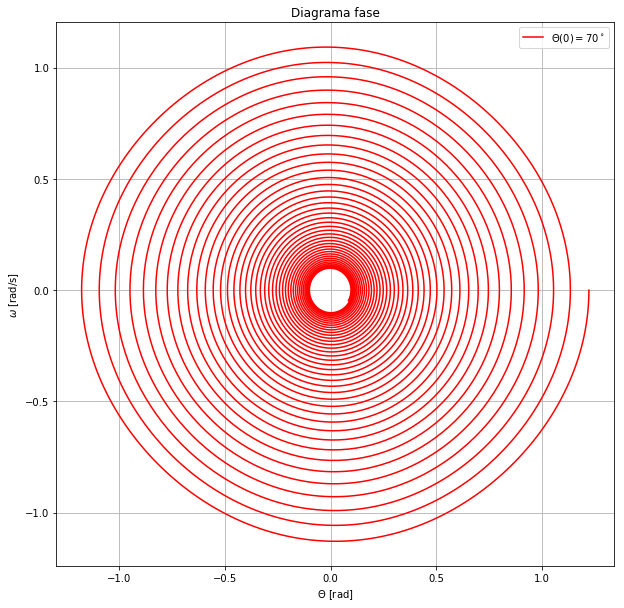

In [88]:
#Gráficas para los espacios fase de los dinstintos valores del ángulo inicial. 
ome_0 = 1.0
miu = 0.02
plt.figure(figsize=(10,10))
t = np.linspace(0, 250, 10000)
y0 = (7*np.pi/18.0,0.0)
plt.plot(solu(t)[:,0], solu(t)[:,1], 'r',label='$\Theta(0)=70^\circ$') 
plt.legend()    
plt.title('Diagrama fase')
plt.xlabel('$\Theta$ [rad]')
plt.ylabel('$\omega$ [rad/s]')
plt.grid()
plt.show()

Se observa la diferencia entre el diagrama fase del péndulo amortiguado y no amortiguado. En el péndulo amortiguado se observa que el límite de la velocidad angular y la posición tiende a cero cuando el tiempo incrementa. 

    b) Compara cada trayectoria del inciso b) del ejercio anterior con este caso amortiguado.

Se utilizan los mismos parámetros para graficar la solución numérica para el ángulo y la velocidad angular. A continuación, se muestran las gráficas de soluciones para un péndulo amortiguado y no amortiguado.  

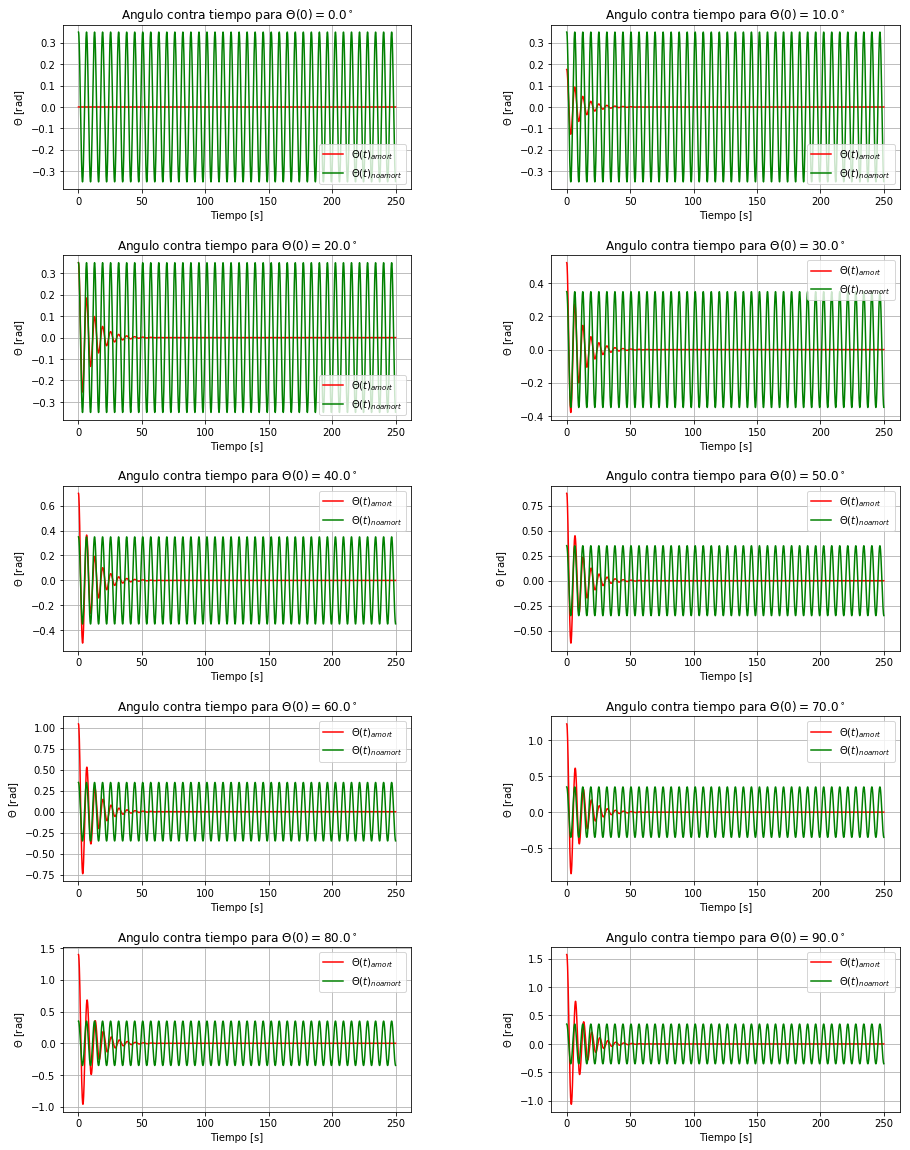

In [117]:
#Gráfica de la solución numérica para el ángulo del péndulo amortiguado y no amortiguado
miu = 0.2  
ome_0 = 1.0
j = 1

plt.figure(figsize=(15,20))
t = np.linspace(0, 250, 10000)
for i in range(0,91,10):
  plt.subplot(5, 2, j)
  plt.subplots_adjust(hspace=0.4, wspace=0.4)
  y0 = (convert(i),0.0)
  plt.plot(t, solu(t)[:,0], 'r',label='$\Theta(t)_{amort}$')
  plt.plot(t, sol_nolin(t)[:,0], 'g',label='$\Theta(t)_{noamort}$')
  j = j+1   
  plt.legend()    
  plt.title('Angulo contra tiempo para $\Theta(0) ={:.1f}^\circ$'.format(i))
  plt.ylabel('$\Theta$ [rad]')
  plt.xlabel('Tiempo [s]')
  plt.grid()
    
    

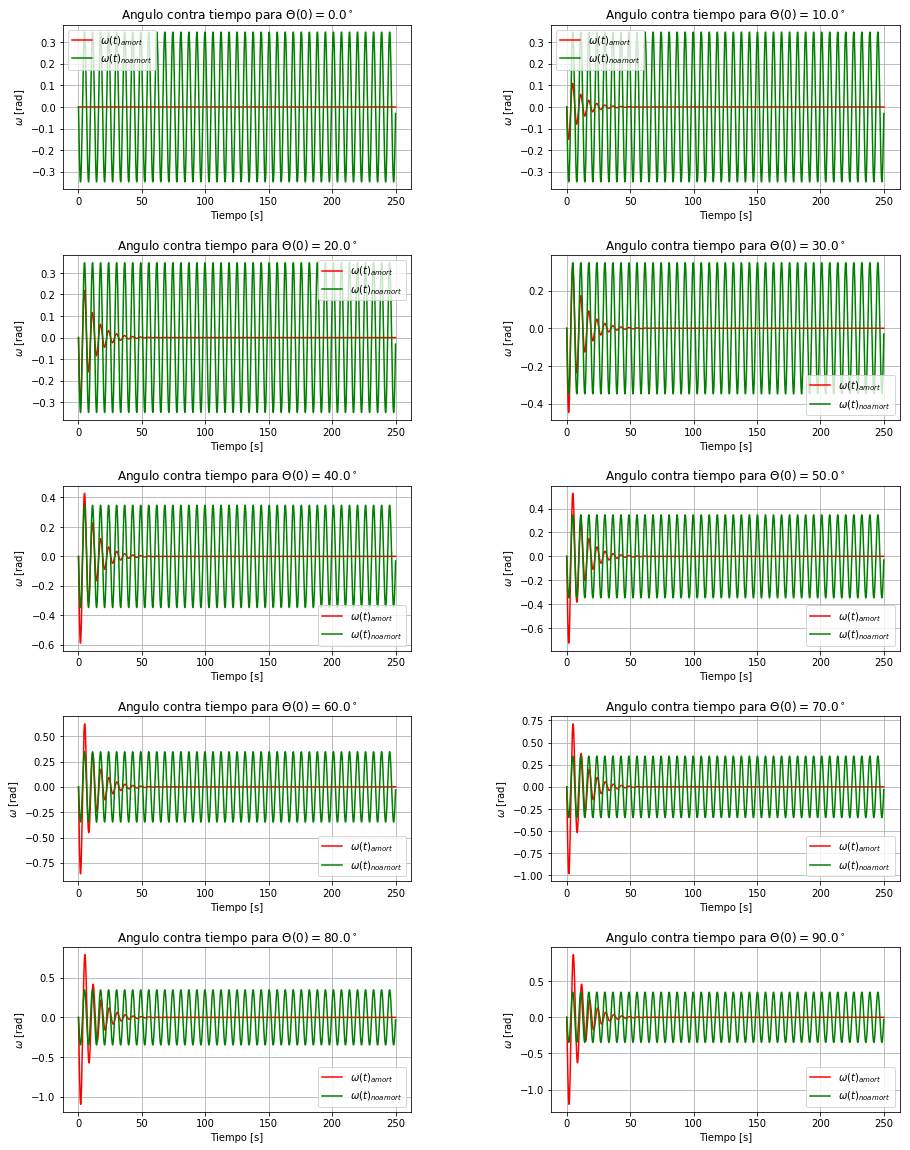

In [118]:
#Gráfica de la solución numérica para la velocidad angular del péndulo amortiguado y no amortiguado
miu = 0.2  
ome_0 = 1.0
j = 1

plt.figure(figsize=(15,20))
t = np.linspace(0, 250, 10000)
for i in range(0,91,10):
  plt.subplot(5, 2, j)
  plt.subplots_adjust(hspace=0.4, wspace=0.4)
  y0 = (convert(i),0.0)
  plt.plot(t, solu(t)[:,1], 'r',label='$\omega(t)_{amort}$')
  plt.plot(t, sol_nolin(t)[:,1], 'g',label='$\omega(t)_{noamort}$')
  j = j+1   
  plt.legend()    
  plt.title('Angulo contra tiempo para $\Theta(0) ={:.1f}^\circ$'.format(i))
  plt.ylabel('$\omega$ [rad]')
  plt.xlabel('Tiempo [s]')
  plt.grid()

Ahora, graficamos los espacio fase de las soluciones numéricas para un péndulo amortiguado y no amortiguado. 

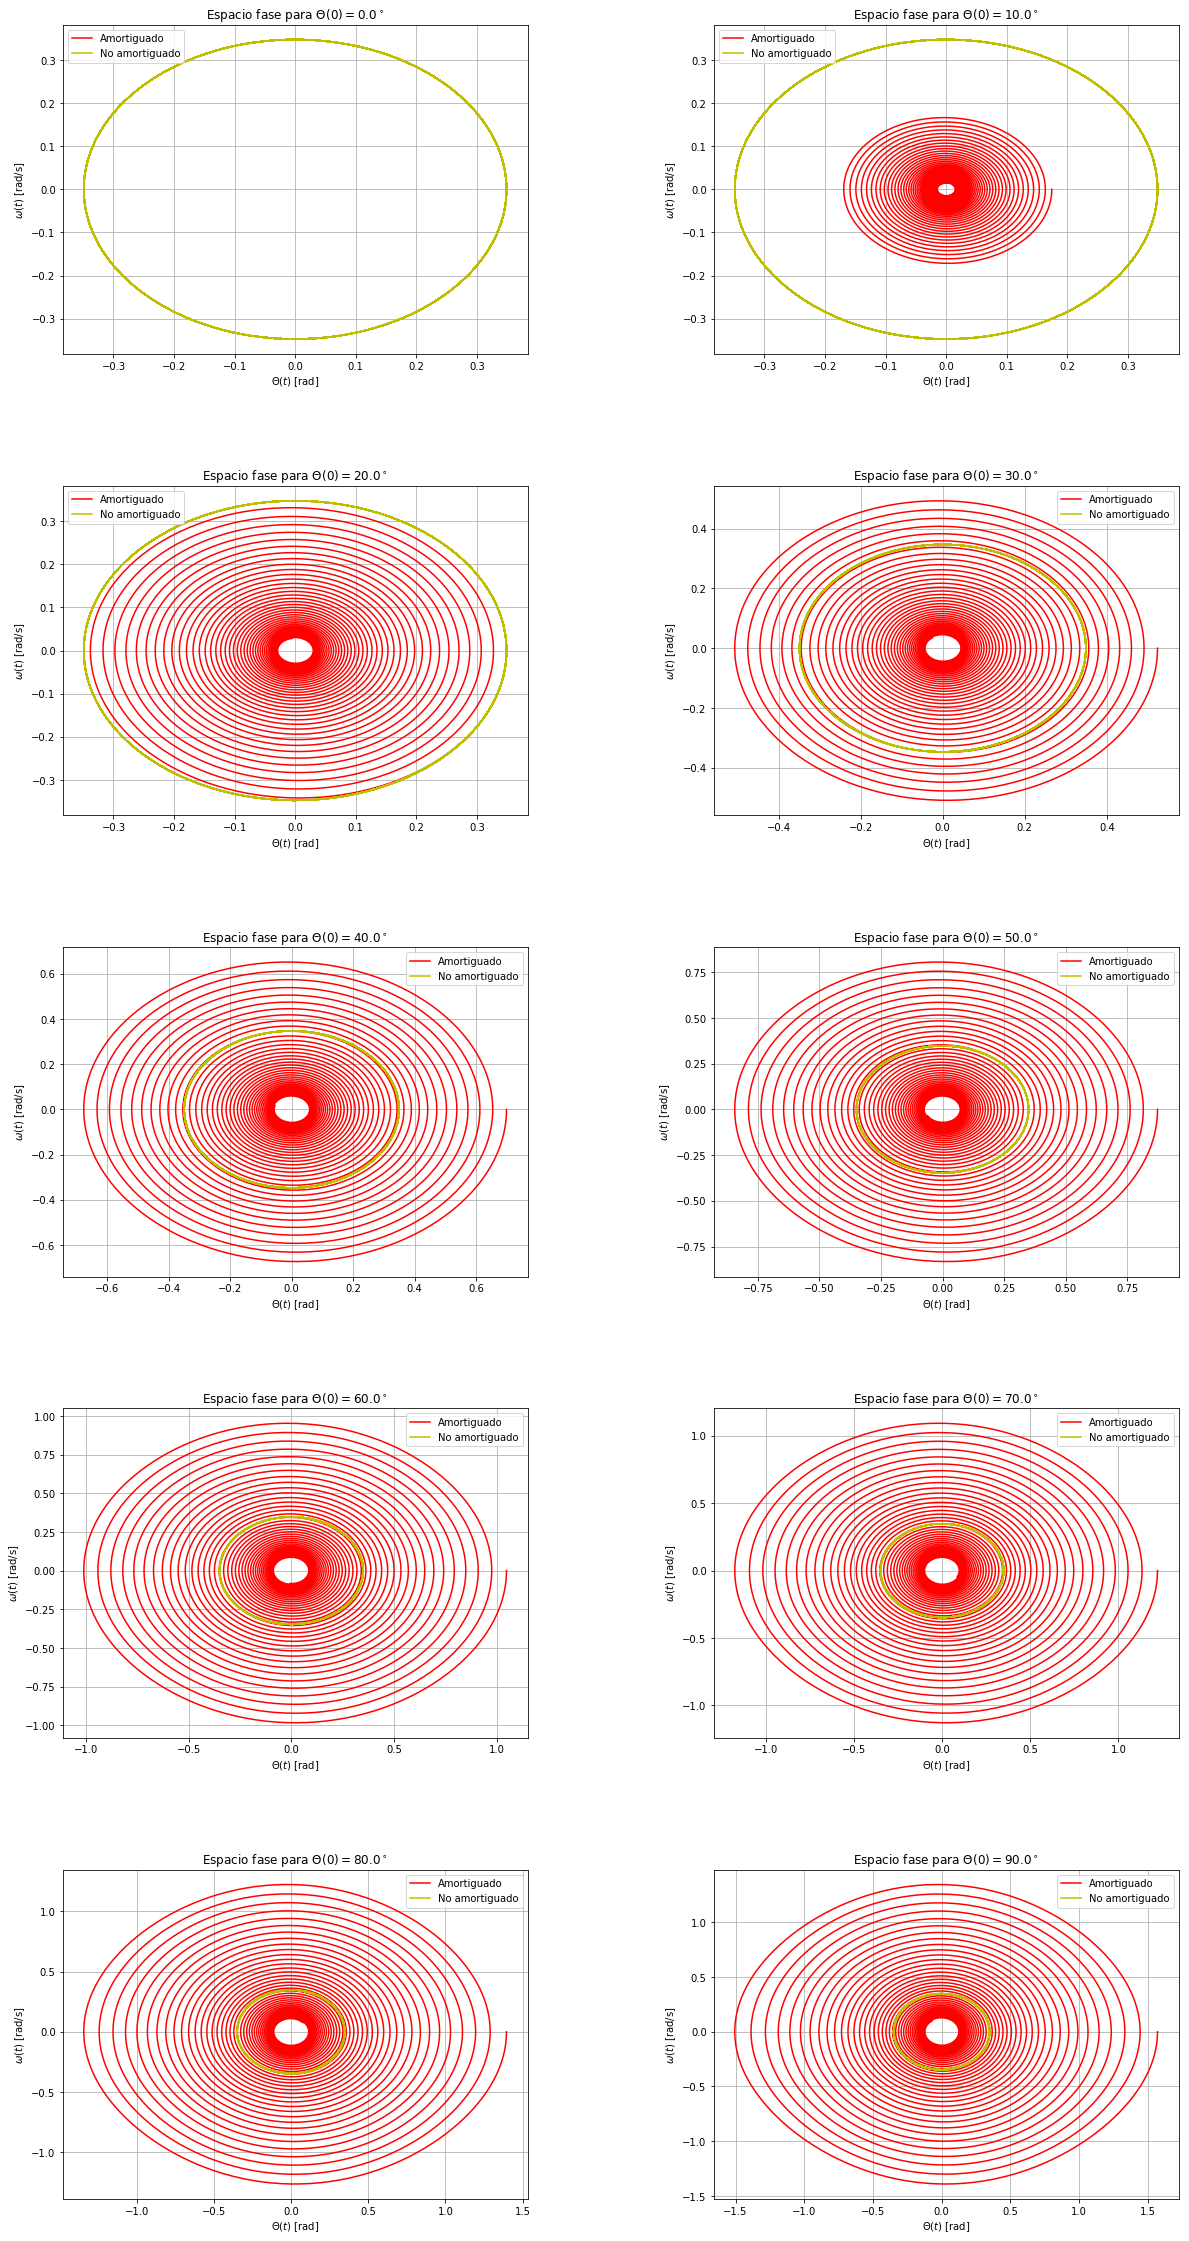

In [138]:
#Gráficas para los espacios fase de los dinstintos valores del ángulo inicial. 
ome_0 = 1.0
miu = 0.02
j = 1

plt.figure(figsize=(20,40))
t = np.linspace(0, 250, 10000)
for i in range(0,91,10):
  plt.subplot(5, 2, j)
  plt.subplots_adjust(hspace=0.4, wspace=0.4)
  y0 = (convert(i),0.0)
  plt.plot(solu(t)[:,0], solu(t)[:,1], 'r',label='Amortiguado')
  plt.plot(sol_nolin(t)[:,0], sol_nolin(t)[:,1], 'y',label='No amortiguado')
  j = j+1   
  plt.legend()    
  plt.title('Espacio fase para $\Theta(0) ={:.1f}^\circ$'.format(i))
  plt.ylabel('$\omega(t)$ [rad/s]')
  plt.xlabel('$\Theta(t)$ [rad]')
  plt.grid()



4.- Ecuación no lineal completa.

La ecuación no lineal del péndulo forzado y con amortiguamiento es
$$Aceleración + Amortiguamiento + Gravedad = Fuerzaexterna$$
que como ecuación se ve
$$\ddot\theta + \mu\dot\theta + \omega_0^2sin(\theta) = Acos\omega t$$

Para resolver esta ecuación diferencial con odeint, primero la convertimos a un sistema de ecuaciones de primer orden. 

Por definición, la velocidad angular es $$\omega = \dot\theta$$
Así, obtenemos el sistema de ecuaciones:
$$\dot\theta(t) = \omega(t)$$ 
y $$\dot\omega(t) = -\mu\dot\theta -\omega_0^2sin\theta + Acos\omega t= -\mu\omega -\omega_0^2sin\theta + Acos\omega t$$
Ahora, dejemos a $x$ como el vector ($\theta$, $\omega$), es decir, $x$ = ($\theta$, $\omega$). Por lo tanto, 
$$\dot x = (\omega, -\mu\omega - \omega_0^2sin\theta + Acos\omega t) $$

Esto puede implementarse con la siguiente función:

In [147]:
#Función para el vector x
def fun_total(x, t, ome_0, miu):
  (theta, omega) = x
  dxdt = (omega, - (miu*omega) - pow(ome_0,2)*np.sin(theta) + A*np.cos(ome*t))
  return dxdt

#funcion para la solución numérica
def sol_total(t):
  sol = odeint(fun_total, x0, t, args = (ome_0,miu))
  return sol

   a) Usando $\mu = 3\pi/2$, $\omega = 2\pi$, $\omega_0 = 3\pi$, grafica la solución para cinco casos de A alrededor de 1.05. Qué pasa con las soluciones. ¿Qué ocurre si A=2?



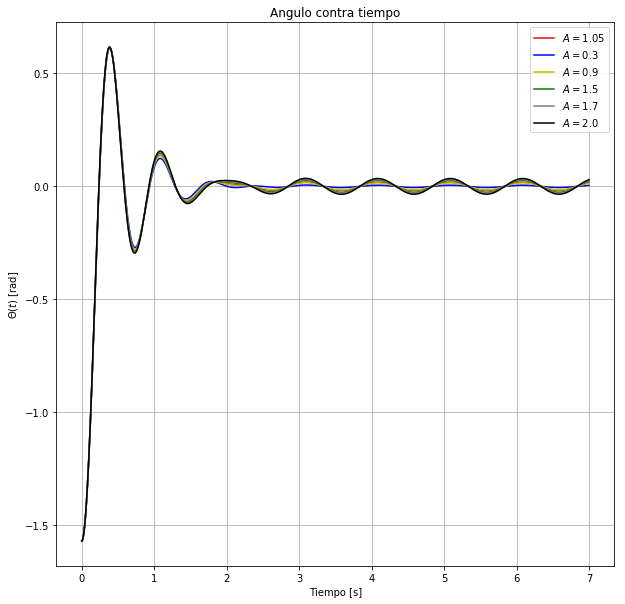

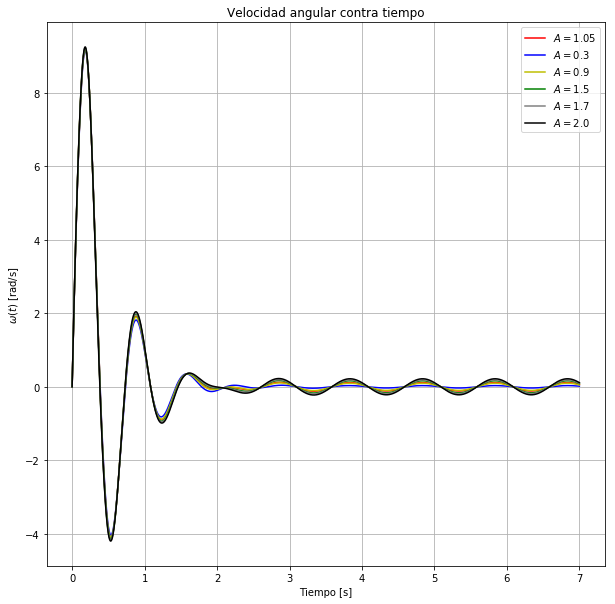

In [196]:
#Gráficas del ángulo contra el tiempo para la ecuación no lineal completa
ome_0 = 3.0*np.pi
miu = 3.0*np.pi/2.0
ome = 2.0*np.pi
x0 = (7.0*np.pi/18.0,0.0)

plt.figure(figsize=(10,10))
t = np.linspace(0, 7, 10000)
A = 1.05     #Primer valor de A
plt.plot(t, sol_total(t)[:,0], 'r', label='$A = 1.05$')
A = 0.3     #Segundo valor de A
plt.plot(t, sol_total(t)[:,0], 'b', label='$A = 0.3$')
A = 0.9     #Tercer valor de A
plt.plot(t, sol_total(t)[:,0], 'y', label='$A = 0.9$')
A = 1.5     #Cuarto valor de A
plt.plot(t, sol_total(t)[:,0], 'g', label='$A = 1.5$')
A = 1.7     #Quinto valor de A
plt.plot(t, sol_total(t)[:,0], 'gray', label='$A = 1.7$')
A = 2.0       #Sexto valor de A
plt.plot(t, sol_total(t)[:,0], 'black', label='$A = 2.0$')
plt.legend(loc='best')
plt.title('Angulo contra tiempo')
plt.xlabel('Tiempo [s]')
plt.ylabel('$\Theta(t)$ [rad]')
plt.grid()
plt.show()

#Gráficas de la velocidad angular contra el tiempo para la ecuación no lineal y la lineal
plt.figure(figsize=(10,10))
A = 1.05     #Primer valor de A
plt.plot(t, sol_total(t)[:,1], 'r', label='$A = 1.05$')
A = 0.3     #Segundo valor de A
plt.plot(t, sol_total(t)[:,1], 'b', label='$A = 0.3$')
A = 0.9     #Tercer valor de A
plt.plot(t, sol_total(t)[:,1], 'y', label='$A = 0.9$')
A = 1.5     #Cuarto valor de A
plt.plot(t, sol_total(t)[:,1], 'g', label='$A = 1.5$')
A = 1.7     #Quinto valor de A
plt.plot(t, sol_total(t)[:,1], 'gray', label='$A = 1.7$')
A = 2.0       #Sexto valor de A
plt.plot(t, sol_total(t)[:,1], 'black', label='$A = 2.0$')
plt.legend(loc='best')
plt.title('Velocidad angular contra tiempo')
plt.xlabel('Tiempo [s]')
plt.ylabel('$\omega(t)$ [rad/s]')
plt.grid()
plt.show()

    b) Obtén las trayectorias en el espacio fase de los casos del inciso anterior.



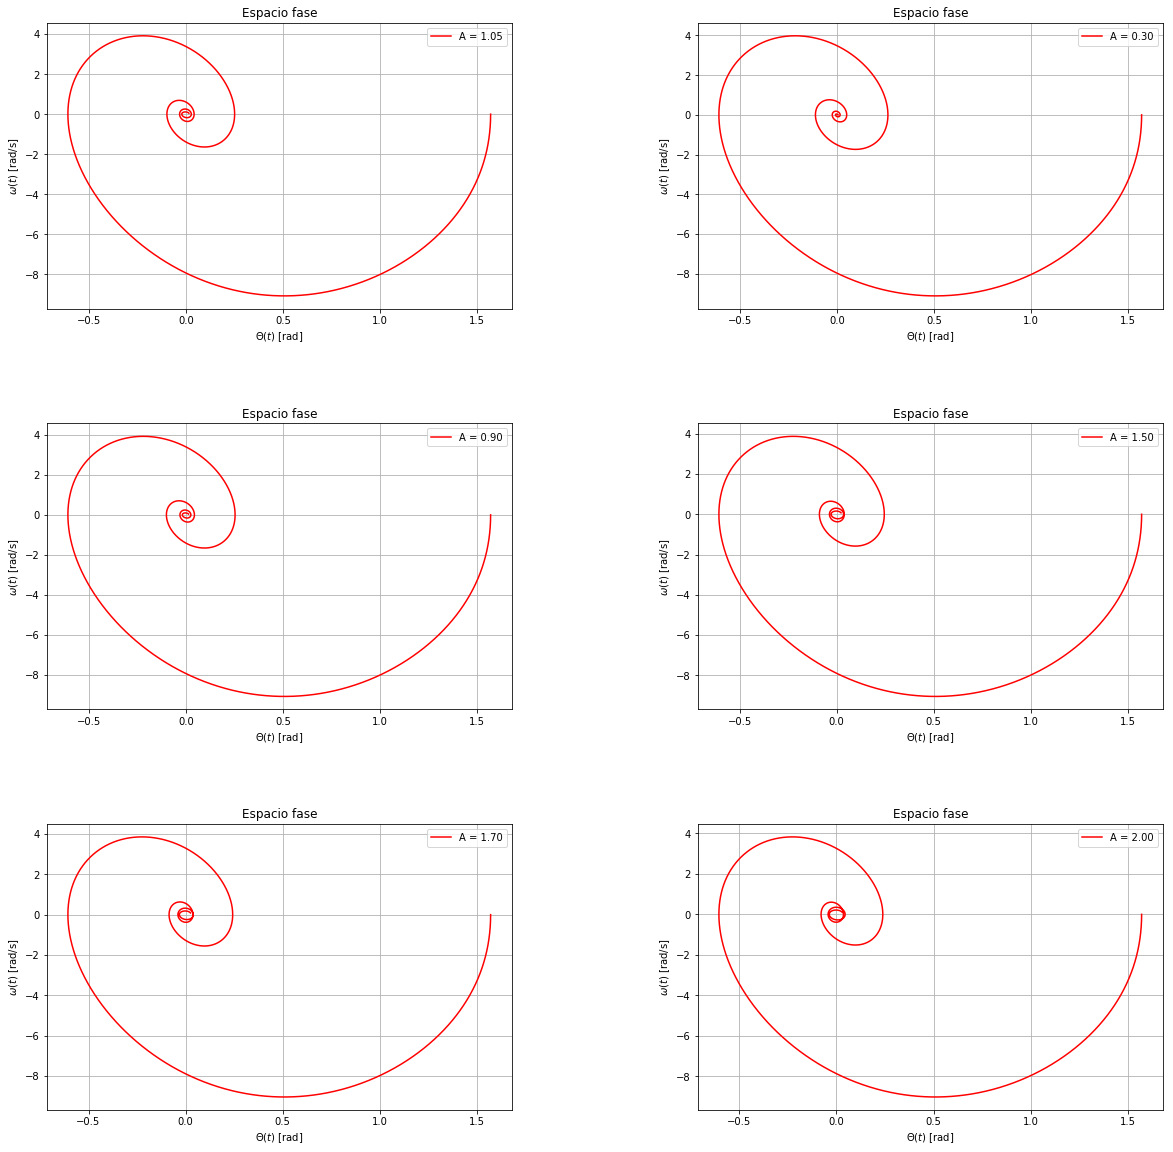

In [195]:
ome_0 = 3.0*np.pi
miu = 3.0*np.pi/2.0
ome = 2*np.pi
x0 = (np.pi/2.0,0.0)
A_n = [1.05,0.3,0.9,1.5,1.7,2.0]

plt.figure(figsize=(20,20))
t = np.linspace(0, 3, 10000)
for i in range(6):
  plt.subplot(3, 2, i+1)
  plt.subplots_adjust(hspace=0.4, wspace=0.4)
  A = A_n[i]  
  plt.plot(sol_total(t)[:,0], sol_total(t)[:,1], 'r',label='A = {:.2f}'.format(A_n[i]))
  plt.legend()    
  plt.title('Espacio fase')
  plt.ylabel('$\omega(t)$ [rad/s]')
  plt.xlabel('$\Theta(t)$ [rad]')
  plt.grid()

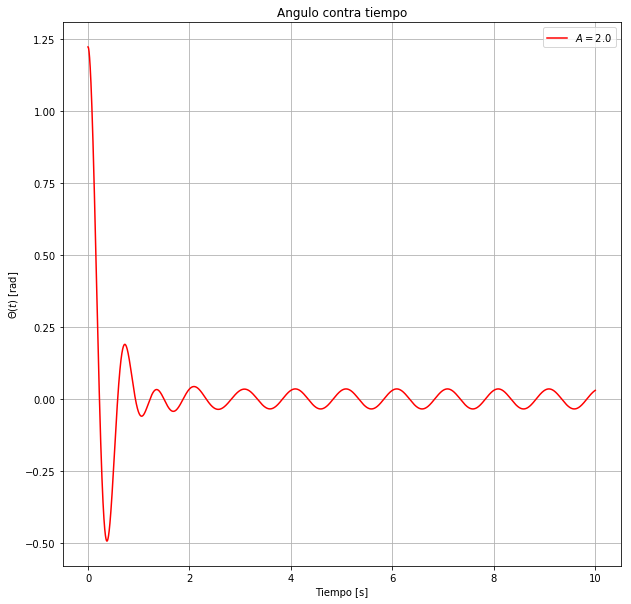

In [204]:
ome_0 = 3.0*np.pi
miu = 3.0*np.pi/2.0
ome = 2.0*np.pi
x0 = (7.0*np.pi/18.0,0.0)

plt.figure(figsize=(10,10))
t = np.linspace(0, 10, 10000)
A = 2.0     #Primer valor de A
plt.plot(t, sol_total(t)[:,0], 'r', label='$A = 2.0$')
plt.legend(loc='best')
plt.title('Angulo contra tiempo')
plt.xlabel('Tiempo [s]')
plt.ylabel('$\Theta(t)$ [rad]')
plt.grid()
plt.show()


In [ ]:
t = np.linspace(0, 6, 1000)
A_n = np.linspace(1.06,1.1,len(t))
solucion = []
for i in range(len(A_n)):
  solucion.append(odeint(fun_total, x0, t, args=(ome_0,miu)))
   
    
plt.figure(figsize=(20,5))
for i in range(len(A_n)):    
  A = A_n[i]  
  plt.plot(A_n, solucion[i][:,0], 'r')
  

plt.legend()    
plt.title('Bifurcación')
plt.ylabel('$A$ [m]')
plt.xlabel('$\Theta(t)$ [rad]')
plt.grid()